In [161]:
#basic lib imports
import pandas as pd
import os.path as path
import numpy as np

#sklearn imports (model lib)
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_blobs

#plotting lib
import matplotlib.pyplot as plt

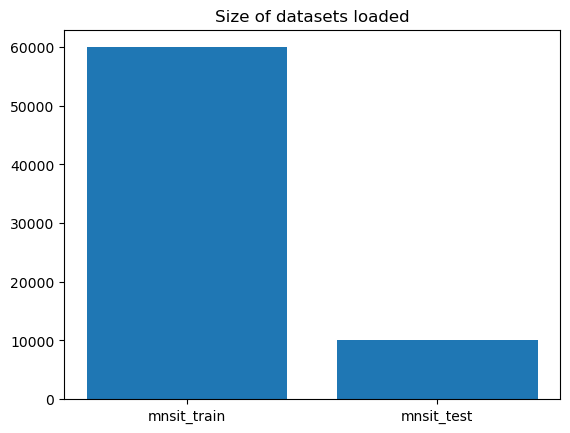

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [162]:
#loading datasets
data_train = pd.read_csv(path.relpath("../data/mnist_train.csv"), header=None)
data_test = pd.read_csv(path.relpath("../data/mnist_test.csv"), header=None)

#plotting for checking loading
fig, ax = plt.subplots()

datasets_names = ("mnsit_train", "mnsit_test")
counts = (len(data_train), len(data_test))
ax.bar(datasets_names, counts)
ax.set_title('Size of datasets loaded')

plt.show()
data_train.describe()

In [163]:
#analyze dataset
#data_train.describe()
n_pixel = data_train.columns #labels
pixel = np.array(data_train.loc[:, 1:].values) #pixels


#plt.scatter(np.count_nonzero(pixel.flat), np.count_nonzero(pixel.flat))
#plt.show()

In [164]:
#Set train X and Y values
X_train = np.array(data_train.loc[:, 1:].values)
Y_train = np.array(data_train.loc[:, 0].values)

#Gaussian Naive Bayes SciKit Model
gnb = GaussianNB()
classifier = gnb.fit(X_train, Y_train)

In [ ]:
#Set test X and Y values5
X_test = np.array(data_test.loc[:, 1:].values)
Y_test = np.array(data_test.loc[:, 0].values)

#Create predicit results with tests
y_pred = classifier.predict(X_test)

In [ ]:
#Analyze results
def analyze():
    print("- Números de classes preditas de forma errada")
    print("%d de %d\n" % ((Y_test != y_pred).sum(), X_test.shape[0]))

    print("- Matriz de confusão:")
    c_matrix = confusion_matrix(Y_test, y_pred, labels=np.array([0,1,2,3,4,5,6,7,8,9]) )
    print(c_matrix, "\n")

    print("- Índices da classificação:")
    print(classification_report(Y_test, y_pred))

    print("- Taxa de erro da classificação por classe:")
    k = 0
    e_matrix = [] #matriz da taxa de erro
    for i in c_matrix:
        rights = i[k]
        total = i.sum()
        e_matrix.append( 100 * ( (total - rights)/total) )
        k += 1
    print(e_matrix)
analyze()

- Números de classes preditas de forma errada
4442 de 10000

- Matriz de confusão:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]] 

- Índices da classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.

In [ ]:
#Adding some alternative configs for NB
n_samples = 50000
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)
y[: n_samples // 2] = 0
y[n_samples // 2 :] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

y[: n_samples // 2] = 0
y[n_samples // 2 :] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])
sample_weight = np.random.RandomState(42).rand(y.shape[0])
clf_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
clf_isotonic.fit(X_train, Y_train, sample_weight=sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]


NameError: name 'make_blobs' is not defined

In [ ]:
#Set train X and Y values
X_train = np.array(data_train.loc[:, 1:].values)
Y_train = np.array(data_train.loc[:, 0].values)

#Categorical Naive Bayes SciKit Model
cnb = CategoricalNB(force_alpha=True)
classifier2 = cnb.fit(X_train, Y_train)

#Create predicit results with tests
y_pred2 = classifier2.predict(X_test[2:3])

#Analyze results
display(confusion_matrix(Y_test, y_pred, labels=np.array([0,1,2,3,4,5,6,7,8,9]) ))

print(classification_report(Y_test, y_pred))

array([[ 870,    0,    3,    5,    2,    5,   31,    1,   35,   28],
       [   0, 1079,    2,    1,    0,    0,   10,    0,   38,    5],
       [  79,   25,  266,   91,    5,    2,  269,    4,  271,   20],
       [  32,   39,    6,  353,    2,    3,   51,    8,  409,  107],
       [  19,    2,    5,    4,  168,    7,   63,    7,  210,  497],
       [  71,   25,    1,   20,    3,   44,   40,    2,  586,  100],
       [  12,   12,    3,    1,    1,    7,  895,    0,   26,    1],
       [   0,   15,    2,   10,    5,    1,    5,  280,   39,  671],
       [  13,   72,    3,    7,    3,   11,   12,    4,  648,  201],
       [   5,    7,    3,    6,    1,    0,    1,   13,   18,  955]],
      dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



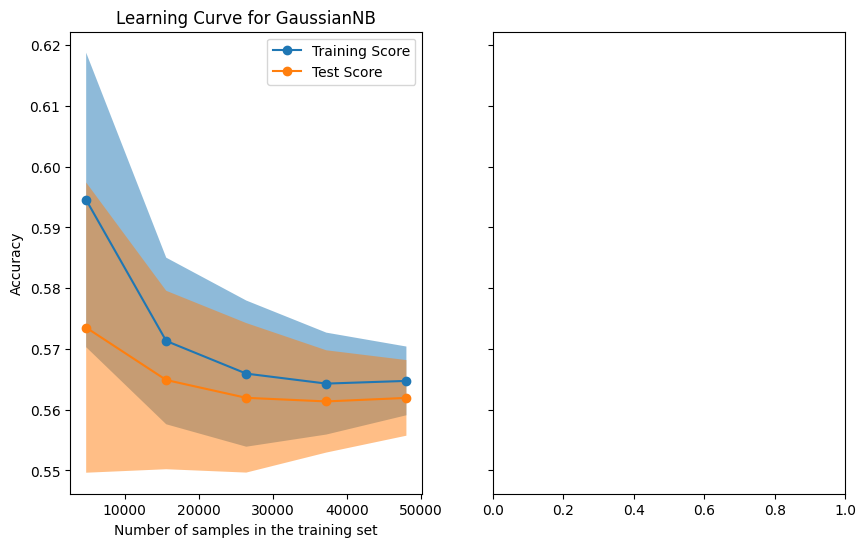

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": Y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gnb]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")